In [1]:
import graph
import patrols
import stats

import pickle
import numpy as np
import os
import random

g = graph.Graph()
g.loadGraph("./out/saved_graph_races.pkl")

In [3]:
fitting_results = {}

for arrest_prob in [p / 20 for p in range(1,21)]:
    # Vary probability from 0-1 with 0.05 increments
    uniform_arrest_rate = {node.ID : arrest_prob for node in g.nodes.values()}
    
    for walk_length in [l * 5000 for l in range(2,12)]:
        #Vary walk length from 1,000 to 55,000 steps of 5,000
        
        sim_means = []
        sim_std_devs = []
        
        for t in range(10):
            print(f"Prob: {arrest_prob}, Length: {walk_length}, sim#: {t}.", end="\r")
            # run 10 trials
            all_nodes = {}
            
            for pID in range(1,22):
                while(True):
                    start = random.choice(list(g.precincts[pID].values()))
                    try:
                        path, arrests = patrols.random_walk_precinct(walk_length, g, start, uniform_arrest_rate)
                        all_nodes.update(arrests)
                    except:
                        continue
                    else:break

            sim_means.append(stats.sim_mean(all_nodes))
            sim_std_devs.append(stats.sim_stddev(all_nodes))
        
        mean_mean = sum(sim_means) / len(sim_means)
        mean_stddev = sum(sim_std_devs) / len(sim_std_devs)
        
        fitting_results[(arrest_prob, walk_length)] = (mean_mean, mean_stddev)

pout = open("./out/fitting_results.pkl", 'wb+')
pickle.dump(fitting_results, pout)
pout.close()

In [27]:
x = set()
y = set()
for key in fitting_results.keys():
    x.add(key[0])
    y.add(key[1])



x = list(x)
y = list(y)

x.sort()
y.sort()

print(x)
print(y)

Z = np.zeros((len(y),len(x)))

print(Z.shape)

for j in range(len(y)):
    for i in range(len(x)):
        (Z[j,i], _) = fitting_results[(x[i], y[j])]

print(Z)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
[10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000]
(10, 20)
[[ 0.18816272  0.37749288  0.56308081  0.75136887  0.94004369  1.12827445
   1.31665025  1.50442801  1.69264803  1.88163262  2.06869595  2.25617648
   2.44470626  2.6311823   2.81971566  3.00812548  3.19612706  3.38331931
   3.57186879  3.76013895]
 [ 0.28235421  0.56358395  0.84618167  1.12777489  1.41103511  1.6910455
   1.97205142  2.25862773  2.53999893  2.82024387  3.10439041  3.38359326
   3.66568963  3.94654515  4.23007574  4.51514441  4.7956078   5.07640423
   5.3584433   5.64020842]
 [ 0.37632187  0.75114147  1.128133    1.5024799   1.87904886  2.25654175
   2.62894949  3.00774589  3.38551272  3.76173432  4.13529517  4.5108095
   4.88838833  5.26334044  5.64153521  6.01757417  6.39081452  6.76943186
   7.14401332  7.52027789]
 [ 0.47126896  0.94155133  1.41055525  1.88004261  2.35298573  2

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm



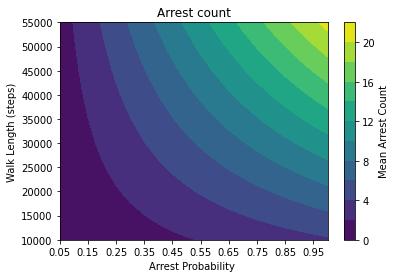

In [46]:
## Plot and save both outputs

fig, ax = plt.subplots()

# ax.scatter(x, y, s=arrCnt, alpha=0.2)
CS = ax.contourf(x, y, Z, levels = 10, cmap='viridis') # color instead of size 
ax.set_xlabel('Arrest Probability ')
ax.set_ylabel('Walk Length (steps)')

ax.set_xticks(np.arange(0.05,1.0,0.1))
ax.set_title("Arrest count")

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel("Mean Arrest Count")


plt.savefig("./out/parameter_fitting_plot")